Feature Selective Networks for Object Detection

该论文的出发点是，改善roi 的特征处理来增强检测效果。

之前的roi pooing将roi特征进行简单的全通道池化来得到roi的特征图，没有考虑roi上子区域间的联系和长宽比。

总的来说，边缘特征用来定位，中心特征用来分类。
经典的roi pooling是针对不同的子区域和宽高比来提取特征的，不同子区域的特征在所有通道上被池化，很少强调分量的位置关系和宽高比。

关于roi pooling的描述https://blog.csdn.net/zj360202/article/details/78845601


本文提出利用roi子区域和宽高比之间的差异来改进roi的特征表示。

使用本文中的网络结构，为整张图片生成了子区域注意库和宽高比注意库，基于roi的子区域注意图和宽高比注意图，有选择地从库中选择，然后汇聚起来，
用于提取特征，然后用来roi分类。

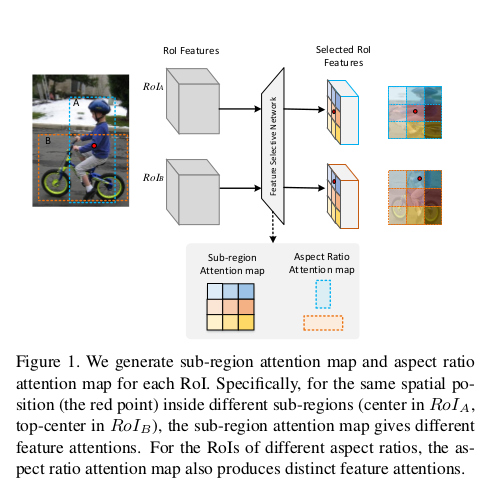
图片１，对于每一个RoI，生成一个子区域注意力图和宽高比注意力图。在不同RoI中的同一位置，子区域注意力图给予不同的特征注意。
对于不同的RoIs,宽高比注意力图也生成有明显区别的特征注意。

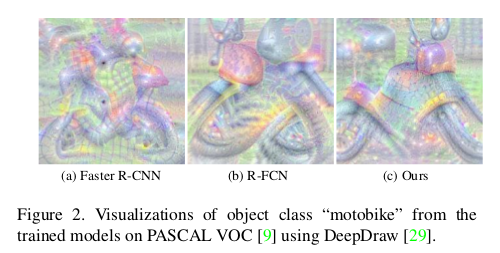
图片2,显示，rfcn能较好地保持物体的局部特征，但难以保持物体的全局特征。而本文提出的网络结构则可以通过生成子区域主语图来扩展子区域信息，
从而能较好的保持物体的全局特征。

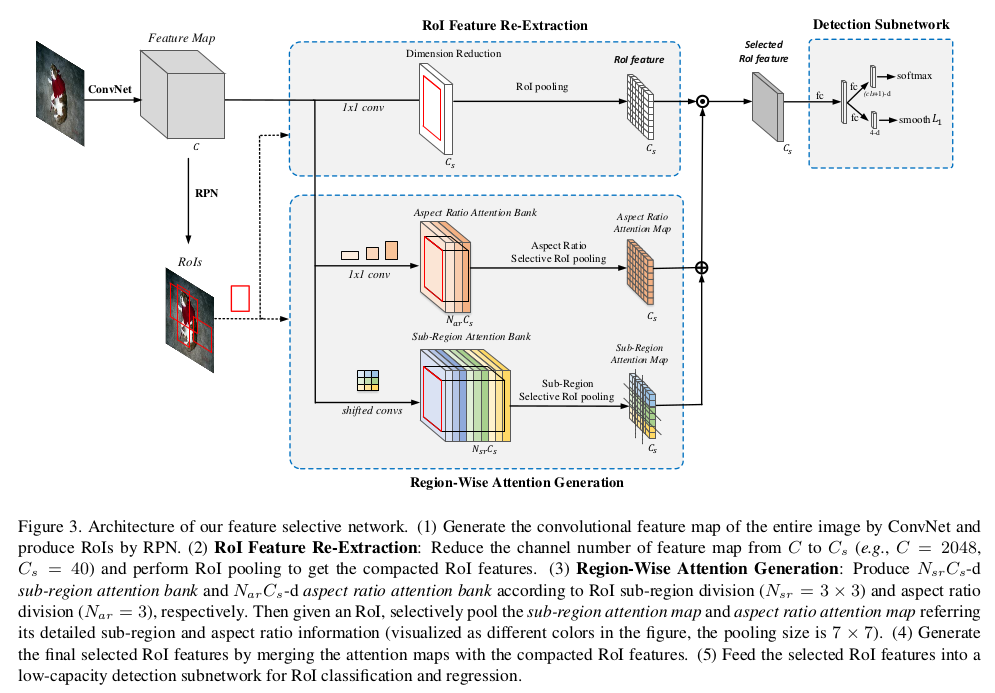
图片３，分区域注意力生成(Region-wise attention Generation),根据RoI子区域划分和长宽比，分别生成子区域注意图和长宽比注意图。
然后一定RoI,有选择地将子区域注意图和长宽比注意图结合起来，。通过将注意图映射与压缩后的RoI特征合并，生成最终的roi特征。

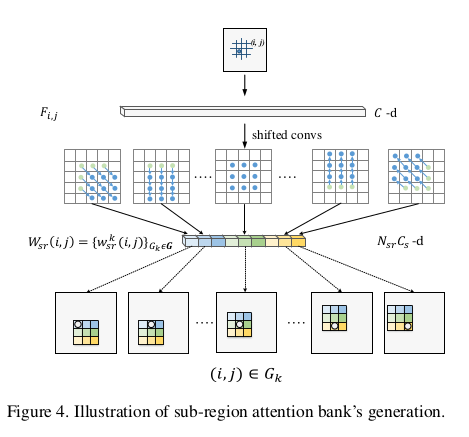

图４，将f(i,j)一个C维的特征图使用shifted convs生成关于该(i,j)位置的sub-region attention bank.
(这句话有问题：sub-region attention就是该位置处，与同在一个roi的其他位置的联系)
通过使用shifted　convs来生成一个NsrCs-维的特征，该特征称为sub-region attention bank.

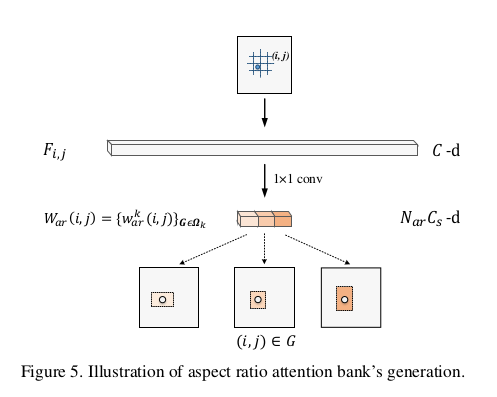
图５，将f(i,j)一个Ｃ维的特征图，使用1×1的卷积层来生个一个NarCs维的aspect ratio bank.
该aspect ratio bank包含了对于该点的（说不清。。继续看）

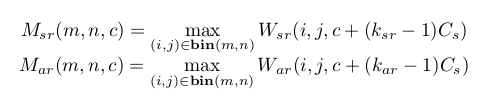




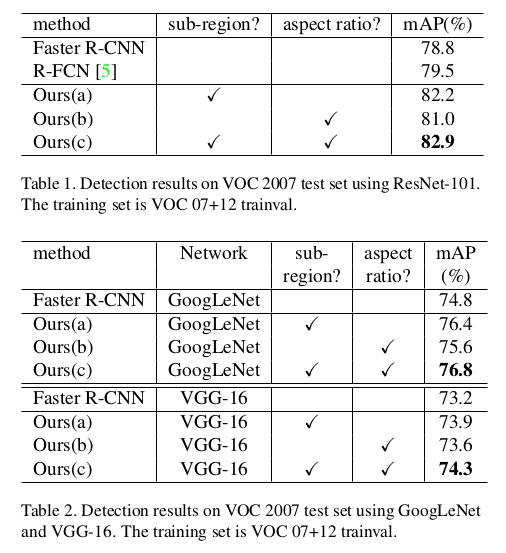

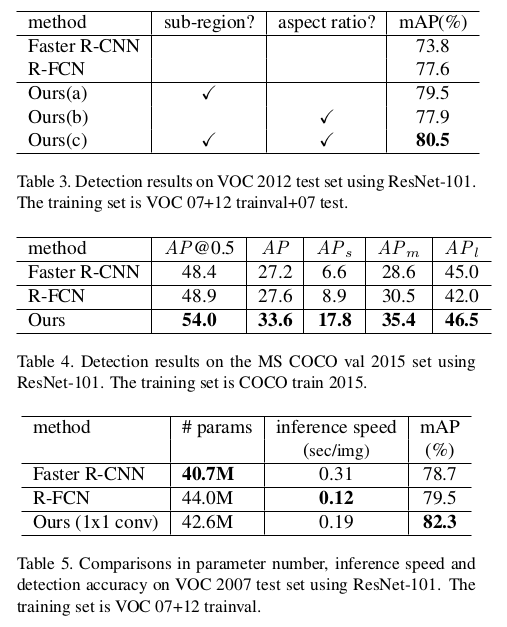
